# Table of Contents

###  [Data Gathering](#sources)

###  [Data Wrangling](#wrangle)

**[Issues need to be addressed after assessnment ](#issues)**

###  [Data Cleaning](#clean)

**[Quality issues](#quality)**

**[Tidiness issues](#tidi)**

###  [Data Analysis](#analysis)


<a id = 'sources'> </a>
## Data Gathering

**Three data files were obtained:\ 
-image-predictions.tsv (requests) \
-twitter-archive-enhanced.csv  \
-tweet_json.txt(twitter API)\**


In [1]:

import requests
import pandas as pd 
import numpy as np
# import os 
# import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Request and view image prediction file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content) 
    


In [3]:
image_pre = pd.read_csv('image-predictions.tsv', sep='\t')
image_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [4]:
# import twitter_archive_enhanced.csv
twitter_arc =pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
tweet_json =pd.read_json('tweet_json.txt',lines= True)                       
tweet_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

<a id = 'wrangle'> </a>
## Data wrangle


In [7]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [9]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_arc.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [12]:
twitter_arc[twitter_arc['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [13]:
twitter_arc.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [14]:
twitter_arc[twitter_arc['retweeted_status_id'].notna ()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [16]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


<a id = 'issues'> </a>
## Issues need to be addressed after assessnment 

### Quality

#### Table ` image_pre`
- Mixed lowercase and uppercase letters in dog breed name (p1,p2,p3)
- tweet_id's type should be str
 

#### Table `twitter_arc`
- Erroneous datatypes (twitter_id: float)
- Name: missing or inaccurate ***(could not be recovered)***
- Some demoninator are equal to 0
- Remove all retweeted data(rows)
- Drop columns that mostly are NaN: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'.
- Remove all retweeted records

#### Table `twitter_json`
- Both id and id_str 's type should be str
- Drop columns without values

### Tidiness

#### Table `twitter_arc`
1. Four variables (doggo, floofer, pupper, puppo) shuold be in one column as Dog_stage
2. Combine all three tables together  

<a id = 'clean'> </a>
## Data clean

In [17]:
image_pre_clean=image_pre.copy()
twitter_arc_clean=twitter_arc.copy()
tweet_json_clean=tweet_json.copy()


#### Table `twitter_arc`
- Erroneous datatypes (twitter_id: float)
- Demoninator equal to 0
- Drop columns that mostly are NaN
- Remove all retweeted data(rows)
- Remove all retweeted records  

**Define** 
- Convert twitter_id's type as str
- If demonimator equal to 0, drop these rows
- Drop columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
- Drop rows that 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' are not null

**code** 
<a id = 'quality'> </a>

In [18]:
# Convert twitter_id's type as str
twitter_arc_clean.tweet_id = twitter_arc_clean.tweet_id.astype(str)
# Drop columns that denominator = 0
twitter_arc_clean_0 = twitter_arc_clean[twitter_arc_clean['rating_denominator']==0]
twitter_arc_clean.drop(twitter_arc_clean_0.index,inplace=True)

# Remove retweeted rows
twitter_arc_clean= twitter_arc_clean[twitter_arc_clean['retweeted_status_id'].isnull()]








In [23]:
# check all retweeted rows
twitter_arc_clean[twitter_arc_clean['retweeted_status_id'].notna()]
twitter_arc_clean[twitter_arc_clean['retweeted_status_user_id'].notna()]
twitter_arc_clean[twitter_arc_clean['retweeted_status_timestamp'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
# Drop null columuns
twitter_arc_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

**test**

In [28]:
#  check all datatypes
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2174 non-null   object
 1   timestamp           2174 non-null   object
 2   source              2174 non-null   object
 3   text                2174 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2174 non-null   int64 
 6   rating_denominator  2174 non-null   int64 
 7   name                2174 non-null   object
 8   doggo               2174 non-null   object
 9   floofer             2174 non-null   object
 10  pupper              2174 non-null   object
 11  puppo               2174 non-null   object
dtypes: int64(2), object(10)
memory usage: 220.8+ KB


In [29]:
# Check rows with denominator =0
twitter_arc_clean[twitter_arc_clean['rating_denominator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo



#### Table ` image_pre`
- Mixed lowercase and uppercase letters in dog breed name (p1,p2,p3)
- tweet_id's type should be str

**Define**\
Convert the first chatacter of dog breed in p1,p2,p3 to uppercase.
Convert tweet_id  type as str

**code**

In [30]:
# Capitalized the first letter
image_pre_clean.p1=image_pre_clean.p1.apply(lambda x : x[:1].upper()+x[1:].lower())
image_pre_clean.p2=image_pre_clean.p2.apply(lambda x : x[:1].upper()+x[1:].lower())
image_pre_clean.p3=image_pre_clean.p3.apply(lambda x : x[:1].upper()+x[1:].lower())
# convert tweet_id datatype
image_pre_clean.tweet_id = image_pre_clean.tweet_id.astype(str)

**test**

In [31]:
#  All dog breed names are capitalized
image_pre_clean[['p1','p2','p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English_springer,German_short-haired_pointer
2071,Paper_towel,Labrador_retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


#### Table `twitter_json`
- Both id and id_str 's type should be str
- Drop columns without values


**Define**\
- Drop columns without values
- Convert id, id_str  type as str

**code**

In [32]:
#  Drop columns and convert datatype

tweet_json_clean.id= tweet_json_clean.id.astype(str)
tweet_json_clean.id_str= tweet_json_clean.id_str.astype(str)

tweet_json_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id_str','in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates','place','contributors','retweeted_status','quoted_status_id_str','quoted_status_id','quoted_status'], axis=1,inplace=True)


**test**

In [33]:
tweet_json_clean.info()
tweet_json_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,0.0,0.0,en
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,0.0,0.0,en
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,0.0,0.0,en
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,0.0,0.0,en
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,0.0,0.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,0.0,0.0,en
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,147,311,False,False,0.0,0.0,en
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,128,False,False,0.0,0.0,en
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48,132,False,False,0.0,0.0,en


<a id = 'tidi'> </a>
#### Table `twitter_arc`
1. Four variables (doggo, floofer, pupper, puppo) shuold be in one column as Dog_stage
2. Combine all there tables together  

**Define**
1. Combine the doggo, floofer, pupper, puppo colums as Dog_stage
2. Mergeing all three tables together on tweet_id


**code**

In [34]:
# Replace None with nan ,then concatnate all four columns 
twitter_arc_clean.doggo.replace('None','',inplace=True)
twitter_arc_clean.floofer.replace('None','',inplace=True)
twitter_arc_clean.pupper.replace('None','',inplace=True)
twitter_arc_clean.puppo.replace('None','',inplace=True)
twitter_arc_clean['Dog_stage'] = twitter_arc_clean.doggo +twitter_arc_clean.floofer+twitter_arc_clean.pupper+twitter_arc_clean.puppo
twitter_arc_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
twitter_arc_clean['Dog_stage'].replace('',np.nan, inplace=True)

In [35]:
# check combined column
twitter_arc_clean['Dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [36]:
# rename the dog_stages
twitter_arc_clean['Dog_stage'].fillna('np.nap',inplace=True)
twitter_arc_clean.loc[twitter_arc_clean['Dog_stage']=='doggopuppo', 'Dog_stage']='doggo, puppo'
twitter_arc_clean.loc[twitter_arc_clean['Dog_stage']=='doggofloofer', 'Dog_stage']='doggo, floofer'
twitter_arc_clean.loc[twitter_arc_clean['Dog_stage']=='doggopupper', 'Dog_stage']='doggo, pupper'

In [37]:
twitter_arc_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage
1422,698178924120031232,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,np.nap
2121,670408998013820928,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,np.nap


In [38]:
# check combined column again
twitter_arc_clean['Dog_stage'].unique()

array(['np.nap', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [39]:
# merge all three tables on left 
tweet_json_clean['tweet_id']= tweet_json_clean['id']
twitter_all = pd.merge(twitter_arc_clean,tweet_json_clean,how='left', on= 'tweet_id')
twitter_all =pd.merge(twitter_all,image_pre_clean,how='left', on= 'tweet_id')

**test**

In [40]:
twitter_arc_clean.sample(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage
1529,690248561355657216,2016-01-21 19:04:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxwell. That's his moped. He rents it...,https://twitter.com/dog_rates/status/690248561...,11,10,Maxwell,np.nap
395,825535076884762624,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo
275,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,np.nap
2063,671159727754231808,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,np.nap
1715,680221482581123072,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,np.nap
...,...,...,...,...,...,...,...,...,...
1141,727644517743104000,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo
1493,692752401762250755,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",https://twitter.com/dog_rates/status/692752401...,13,10,None,pupper
1570,687732144991551489,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ember. That's the q-tip she owes money...,https://vine.co/v/iOuMphL5DBY,11,10,Ember,np.nap
1791,677335745548390400,2015-12-17 03:53:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,https://vine.co/v/hbLbH77Ar67,12,10,None,np.nap


In [41]:
twitter_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2174 non-null   object             
 1   timestamp                      2174 non-null   object             
 2   source_x                       2174 non-null   object             
 3   text                           2174 non-null   object             
 4   expanded_urls                  2117 non-null   object             
 5   rating_numerator               2174 non-null   int64              
 6   rating_denominator             2174 non-null   int64              
 7   name                           2174 non-null   object             
 8   Dog_stage                      2174 non-null   object             
 9   created_at                     2174 non-null   datetime64[ns, UTC]
 10  id                      

In [42]:
# save as new file
new_file= twitter_all.to_csv('twitter_archive_master.csv',index=False)

# test

df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2174 non-null   int64  
 1   timestamp                      2174 non-null   object 
 2   source_x                       2174 non-null   object 
 3   text                           2174 non-null   object 
 4   expanded_urls                  2117 non-null   object 
 5   rating_numerator               2174 non-null   int64  
 6   rating_denominator             2174 non-null   int64  
 7   name                           2174 non-null   object 
 8   Dog_stage                      2174 non-null   object 
 9   created_at                     2174 non-null   object 
 10  id                             2174 non-null   int64  
 11  id_str                         2174 non-null   int64  
 12  full_text                      2174 non-null   o

<a id = 'analysis'> </a>
## Data analysis


In [43]:
twitter_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2174 non-null   object             
 1   timestamp                      2174 non-null   object             
 2   source_x                       2174 non-null   object             
 3   text                           2174 non-null   object             
 4   expanded_urls                  2117 non-null   object             
 5   rating_numerator               2174 non-null   int64              
 6   rating_denominator             2174 non-null   int64              
 7   name                           2174 non-null   object             
 8   Dog_stage                      2174 non-null   object             
 9   created_at                     2174 non-null   datetime64[ns, UTC]
 10  id                      

In [44]:
twitter_all.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,img_num,p1_conf,p2_conf,p3_conf
count,2174.000000,2174.000000,2174.000000,2174.000000,2117.0,2117.0,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,12.779669,10.497700,2759.217571,8749.006900,0.0,0.0,1.203109,0.593941,1.344195e-01,6.024848e-02
std,43.198178,7.017088,4647.314272,12054.473161,0.0,0.0,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,2.000000,0.000000,52.000000,0.0,0.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,608.000000,1910.250000,0.0,0.0,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,11.000000,10.000000,1342.000000,4053.500000,0.0,0.0,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,3220.000000,11110.000000,0.0,0.0,1.000000,0.846285,1.951377e-01,9.159438e-02
max,1776.000000,170.000000,79515.000000,132810.000000,0.0,0.0,4.000000,1.000000,4.880140e-01,2.734190e-01


**Basic analysis**\
Maximum, minimum and average of dog rating for all dogs: 1776/10, 0/10 and 12/10.\
Maximum, minimum and average of favorite_count for all dogs: 132810, 0 and 8111.\
Maximum, minimum and average of retweet_count for all dogs: 79515, 0 and 3172.

In [45]:
twitter_all.groupby(['Dog_stage']).tweet_id.count()

Dog_stage
doggo               75
doggo, floofer       1
doggo, pupper       10
doggo, puppo         1
floofer              9
np.nap            1830
pupper             224
puppo               24
Name: tweet_id, dtype: int64

**Most popular dog stages**\
Most popular dog_stage is pupper(257).

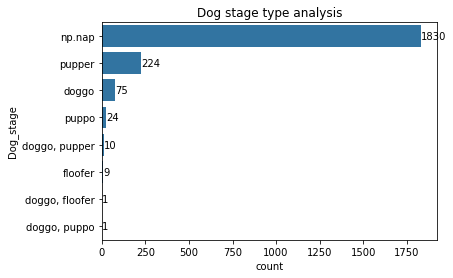

In [46]:

base_color = sns.color_palette()[0]
orders = twitter_all.Dog_stage.value_counts().index
sns.countplot(y='Dog_stage',data=twitter_all, color= base_color, order= orders)

type_counts= twitter_all.Dog_stage.value_counts()

for  i in range (type_counts.shape[0]):
    count= type_counts[i]
    names = '{}'.format(type_counts.values[i])
    plt.text(count+1, i , names, va='center');
    plt.title('Dog stage type analysis')
plt.savefig('type_counts.jpg')

In [47]:
#  prediction successful rates 
twitter_all.p1_dog.mean(),twitter_all.p2_dog.mean(),twitter_all.p3_dog.mean()

(0.7407221664994985, 0.7497492477432297, 0.7251755265797393)

Image prediction successful rates  for dog breed: p1, 73.7%; p2 74.7%; p3 72.1%.

In [48]:
# best rated dog 
twitter_all[twitter_all['rating_numerator']== 1776]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,created_at,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
803,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,np.nap,2016-07-04 15:00:45+00:00,...,1.0,Bow_tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False
